In [16]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


# File to Load (Remember to Change These)

data1_csv = "data/clinicaltrial_data.csv"
data2_csv = "data/mouse_drug_data.csv"


drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers=['o','x','d','^']
colors=['green','red','black','blue']


# Read the Mouse and Drug Data and the Clinical Trial Data
data1_csv = pd.read_csv(data1_csv, low_memory=False)
data2_csv=pd.read_csv(data2_csv, low_memory = False)

Exp_df = pd.merge(data1_csv, data2_csv, how='left', on='Mouse ID')


Exp_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [17]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

meanExp_time_drug = Exp_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']




# Convert to DataFrame

mean_tumor_volume = pd.DataFrame(meanExp_time_drug)

#mean_tumor_volume_df = mean_tumor_volume_df.reset_index()

# Preview DataFrame

mean_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [18]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

TumorStandard_Error = Exp_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
TumorStandard_Error_df = pd.DataFrame(TumorStandard_Error)

TumorStandard_Error_df = TumorStandard_Error_df.reset_index()


# Preview DataFrame

TumorStandard_Error_df.head()




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [19]:
# Minor Data Munging to Re-Format the Data Frames

mean_tumor_vol = pd.DataFrame(mean_tumor_volume.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])    

# Preview that Reformatting worked

mean_tumor_vol = pd.pivot_table(mean_tumor_volume, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)
mean_tumor_vol.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


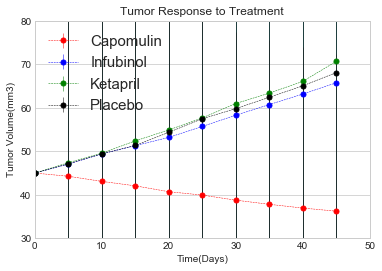

In [20]:
# Generate the Plot (with Error Bars)


plt.errorbar(mean_tumor_vol.index, mean_tumor_vol['Capomulin'], yerr=mean_tumor_vol['Capomulin'],
             color='r', marker='o', markersize = 5,linestyle='--',  linewidth=0.50)

plt.errorbar(mean_tumor_vol.index, mean_tumor_vol['Infubinol'], yerr=mean_tumor_vol['Infubinol'],
             color='b', marker='o', markersize= 5,linestyle='--',  linewidth=0.50)

plt.errorbar(mean_tumor_vol.index, mean_tumor_vol['Ketapril'], yerr=mean_tumor_vol['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.50)

plt.errorbar(mean_tumor_vol.index, mean_tumor_vol['Placebo'], yerr=mean_tumor_vol['Placebo'],
             color='black', marker='o', markersize=5,linestyle='--',  linewidth=0.50)
plt.xlim(0,50)
plt.ylim(30,80)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")


plt.style.use('seaborn-whitegrid')


plt.grid(axis = "x")


# Save the Figure

plt.legend(['Capomulin','Infubinol', 'Ketapril','Placebo'],loc='best', fontsize=15, fancybox=True)

#plt.savefig('Tumor_Response_to_Treatment.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites = Exp_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

#Convert to DataFrame

mean_met_sites_df = pd.DataFrame(mean_met_sites)


# Preview DataFrame

mean_met_sites_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

MetStandard_Error = Exp_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFramesem_met_sites_df=pd.DataFrame(sem_met_sites)




MetStandard_Error = pd.DataFrame(MetStandard_Error)



# Preview DataFrame
MetStandard_Error.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [23]:
# Minor Data Munging to Re-Format the Data Frames

meanMet_vol = pd.DataFrame(mean_met_sites_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])    



# Preview that Reformatting worked
meanMet_vol = pd.pivot_table(mean_met_sites_df, index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc = np.mean)

meanMet_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


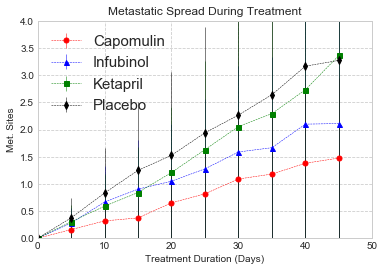

In [24]:
# Generate the Plot (with Error Bars)



plt.errorbar(meanMet_vol.index, meanMet_vol["Capomulin"], yerr=meanMet_vol["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meanMet_vol.index, meanMet_vol["Infubinol"], yerr=meanMet_vol["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meanMet_vol.index, meanMet_vol["Ketapril"],yerr=meanMet_vol["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meanMet_vol.index, meanMet_vol["Placebo"],yerr=meanMet_vol["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)


# Set x and y axis labels including the title of the chart
plt.xlim(0,50)
plt.ylim(0,4)

plt.title('Metastatic Spread During Treatment') # Give plot main title
plt.xlabel('Treatment Duration (Days)') # set text for the x axis
plt.ylabel('Met. Sites') # set text for the y axis

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(['Capomulin','Infubinol', 'Ketapril','Placebo'],loc='best', fontsize=15, fancybox=True)


# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [25]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_cnt=Exp_df.groupby(["Drug", "Timepoint"]).count()['Mouse ID']
mice_cnt

# Convert to DataFrame



mice_cnt_df=pd.DataFrame(mice_cnt)
mice_cnt_df=mice_cnt_df.reset_index()

# Preview DataFrame
mice_cnt_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [26]:
# Minor Data Munging to Re-Format the Data Frames
mice_cnt_df_pivot=mice_cnt_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')
# Preview the Data Frame
mice_cnt_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


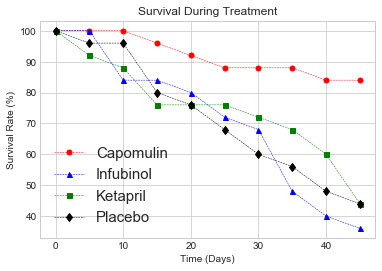

In [27]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mice_cnt_df_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_cnt_df_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_cnt_df_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_cnt_df_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)


plt.title("Survival During Treatment") # Give plot main title
plt.ylabel("Survival Rate (%)") # set text for the y axis
plt.xlabel("Time (Days)") # set text for the x axis
plt.grid(True)
plt.legend(['Capomulin','Infubinol', 'Ketapril','Placebo'],loc='best', fontsize=15, fancybox=True)

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")

# Show the Figure
plt.show()




![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [28]:
# Calculate the percent changes for each drug

perc_change = ((mean_tumor_vol.iloc[-1]-mean_tumor_vol.iloc[0])/mean_tumor_vol.iloc[0])*100

perc_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

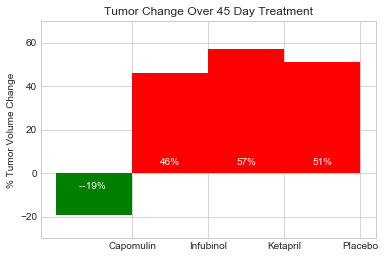

In [29]:
# Store all Relevant Percent Changes into a Tuple



pct_changes = (perc_change["Capomulin"], 
               perc_change["Infubinol"], 
               perc_change["Ketapril"], 
               perc_change["Placebo"])


# Splice the data between passing and failing drugs

fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes

def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure

fig.savefig("Tumor_Change.png")
# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)